In [27]:
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from scipy.stats import pearsonr

In [29]:
sns.set(style='darkgrid', palette="muted", color_codes=True, font_scale=1.3, rc={'figure.figsize':(8,6)})

# Analysis for dataset with samples with RNA-seq

In [118]:
# reading table with RNA-seq related annotations
withseq = pd.read_csv('GTEx_pancreas_liver_images_liverfat_pancreasfat_seq.csv', sep=';')
withseq.head()

,Subject.ID,Tissue.Sample.ID_pancreas,Sex,Age.Bracket,Hardy.Scale,Pathology.Categories_pancreas,Pathology.Notes_pancreas,Tissue.Sample.ID_liver,Pathology.Categories_liver,Pathology.Notes_liver,SAMPID_pancreas,SMTS_pancreas,SMPTHNTS_pancreas,SAMPID_liver,SMTS_liver,SMPTHNTS_liver,"Fat,Percentage_liver","Fat,Percentage_pancreas"
0,GTEX-11EQ9,GTEX-11EQ9-1026,male,30-39,Fast death - natural causes,NaN,"2 pieces, well-preserved, Islets well visualiz...",GTEX-11EQ9-0526,"nodularity, steatosis","2 pieces, diffuse macro and microvesucular ste...",GTEX-11EQ9-1026-SM-5H134,Pancreas,"2 pieces, well-preserved, Islets well visualiz...",GTEX-11EQ9-0526-SM-5A5JZ,Liver,"2 pieces, diffuse macro and microvesucular ste...",27.468310,7.653114
1,GTEX-11GSP,GTEX-11GSP-0426,female,60-69,Fast death - natural causes,NaN,2 pieces; ducts have PanIN 1 changes,GTEX-11GSP-0626,congestion,2 pieces; central vascular congestion,GTEX-11GSP-0426-SM-5A5KX,Pancreas,2 pieces; ducts have PanIN 1 changes,GTEX-11GSP-0626-SM-5986T,Liver,2 pieces; central vascular congestion,26.623697,5.116666
2,GTEX-11TT1,GTEX-11TT1-0326,male,20-29,Ventilator case,NaN,2 pieces,GTEX-11TT1-1726,NaN,2 pieces,GTEX-11TT1-0326-SM-5LUAY,Pancreas,2 pieces,GTEX-11TT1-1726-SM-5EQLJ,Liver,2 pieces,21.957421,2.620380
3,GTEX-12WSD,GTEX-12WSD-1626,female,60-69,Fast death - natural causes,NaN,"2 pieces, minimal fat. Islets stil visible; r...",GTEX-12WSD-1426,no_abnormalities,"2 pieces, no major abnormalities",GTEX-12WSD-1626-SM-5GCNR,Pancreas,"2 pieces, minimal fat. Islets stil visible; r...",GTEX-12WSD-1426-SM-5GCN9,Liver,"2 pieces, no major abnormalities",26.766371,5.548906
4,GTEX-12WSG,GTEX-12WSG-1026,female,50-59,Ventilator case,NaN,2 pieces,GTEX-12WSG-0626,"congestion, steatosis","2 pieces, mild steatosis and passive congestion",GTEX-12WSG-1026-SM-5EGII,Pancreas,2 pieces,GTEX-12WSG-0626-SM-5FQTQ,Liver,"2 pieces, mild steatosis and passive congestion",38.365642,7.912212


### Information for pancreas samples 

In [120]:
# read used IDs for RNAseq
pancreas = pd.read_csv('pancreas.txt')

In [122]:
pancreas_took = ['-'.join(i.split('.')) for i in pancreas['x']]

In [219]:
pancreas_took_table = withseq[withseq.SAMPID_pancreas.isin(pancreas_took)]

In [220]:
# there is appered to be IDs duplicates and I dropped it
pancreas_took_table = pancreas_took_table.drop_duplicates(subset='SAMPID_pancreas', keep="first")

In [223]:
pancreas_took_table.head()

,Subject.ID,Tissue.Sample.ID_pancreas,Sex,Age.Bracket,Hardy.Scale,Pathology.Categories_pancreas,Pathology.Notes_pancreas,Tissue.Sample.ID_liver,Pathology.Categories_liver,Pathology.Notes_liver,SAMPID_pancreas,SMTS_pancreas,SMPTHNTS_pancreas,SAMPID_liver,SMTS_liver,SMPTHNTS_liver,"Fat,Percentage_liver","Fat,Percentage_pancreas"
0,GTEX-11EQ9,GTEX-11EQ9-1026,male,30-39,Fast death - natural causes,NaN,"2 pieces, well-preserved, Islets well visualiz...",GTEX-11EQ9-0526,"nodularity, steatosis","2 pieces, diffuse macro and microvesucular ste...",GTEX.11EQ9.1026.SM.5H134,Pancreas,"2 pieces, well-preserved, Islets well visualiz...",GTEX-11EQ9-0526-SM-5A5JZ,Liver,"2 pieces, diffuse macro and microvesucular ste...",27.468310,7.653114
1,GTEX-11GSP,GTEX-11GSP-0426,female,60-69,Fast death - natural causes,NaN,2 pieces; ducts have PanIN 1 changes,GTEX-11GSP-0626,congestion,2 pieces; central vascular congestion,GTEX.11GSP.0426.SM.5A5KX,Pancreas,2 pieces; ducts have PanIN 1 changes,GTEX-11GSP-0626-SM-5986T,Liver,2 pieces; central vascular congestion,26.623697,5.116666
2,GTEX-11TT1,GTEX-11TT1-0326,male,20-29,Ventilator case,NaN,2 pieces,GTEX-11TT1-1726,NaN,2 pieces,GTEX.11TT1.0326.SM.5LUAY,Pancreas,2 pieces,GTEX-11TT1-1726-SM-5EQLJ,Liver,2 pieces,21.957421,2.620380
3,GTEX-12WSD,GTEX-12WSD-1626,female,60-69,Fast death - natural causes,NaN,"2 pieces, minimal fat. Islets stil visible; r...",GTEX-12WSD-1426,no_abnormalities,"2 pieces, no major abnormalities",GTEX.12WSD.1626.SM.5GCNR,Pancreas,"2 pieces, minimal fat. Islets stil visible; r...",GTEX-12WSD-1426-SM-5GCN9,Liver,"2 pieces, no major abnormalities",26.766371,5.548906
4,GTEX-12WSG,GTEX-12WSG-1026,female,50-59,Ventilator case,NaN,2 pieces,GTEX-12WSG-0626,"congestion, steatosis","2 pieces, mild steatosis and passive congestion",GTEX.12WSG.1026.SM.5EGII,Pancreas,2 pieces,GTEX-12WSG-0626-SM-5FQTQ,Liver,"2 pieces, mild steatosis and passive congestion",38.365642,7.912212


In [240]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
pancreas_took_table['binned'] = pd.cut(pancreas_took_table['Fat,Percentage_pancreas'], bins)

In [ ]:
# save files for r annotation
pancreas_took_table[['binned']].to_csv('pancreas_bins.csv')

(array([36., 10., 14.,  6.,  7.,  2.,  1.,  3.,  0.,  3.]),
 array([ 2.62037956,  9.01104677, 15.40171397, 21.79238118, 28.18304839,
        34.5737156 , 40.96438281, 47.35505002, 53.74571722, 60.13638443,
        66.52705164]),
 <a list of 10 Patch objects>)

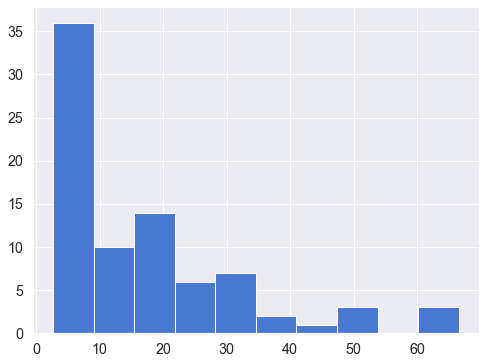

In [174]:
# the distribution of fat percentage across patients
plt.hist(pancreas_took_table['Fat,Percentage_pancreas'])

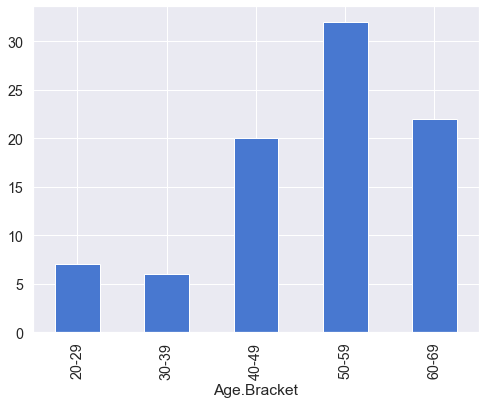

In [105]:
# the distribution of age across pancreas samples from patients
pancreas_took_table.groupby('Age.Bracket')['Age.Bracket'].count().plot(kind = 'bar')

### Information for liver samples

In [148]:
liver_t = pd.read_csv('liver_taken.txt')

In [154]:
liver_took_table = withseq[withseq.SAMPID_liver.isin(liver_took)]

In [244]:
liver_took_table.head()

,Subject.ID,Tissue.Sample.ID_pancreas,Sex,Age.Bracket,Hardy.Scale,Pathology.Categories_pancreas,Pathology.Notes_pancreas,Tissue.Sample.ID_liver,Pathology.Categories_liver,Pathology.Notes_liver,SAMPID_pancreas,SMTS_pancreas,SMPTHNTS_pancreas,SAMPID_liver,SMTS_liver,SMPTHNTS_liver,"Fat,Percentage_liver","Fat,Percentage_pancreas",binned
0,GTEX-11EQ9,GTEX-11EQ9-1026,male,30-39,Fast death - natural causes,NaN,"2 pieces, well-preserved, Islets well visualiz...",GTEX-11EQ9-0526,"nodularity, steatosis","2 pieces, diffuse macro and microvesucular ste...",GTEX-11EQ9-1026-SM-5H134,Pancreas,"2 pieces, well-preserved, Islets well visualiz...",GTEX.11EQ9.0526.SM.5A5JZ,Liver,"2 pieces, diffuse macro and microvesucular ste...",27.468310,7.653114,"(20, 30]"
1,GTEX-11GSP,GTEX-11GSP-0426,female,60-69,Fast death - natural causes,NaN,2 pieces; ducts have PanIN 1 changes,GTEX-11GSP-0626,congestion,2 pieces; central vascular congestion,GTEX-11GSP-0426-SM-5A5KX,Pancreas,2 pieces; ducts have PanIN 1 changes,GTEX.11GSP.0626.SM.5986T,Liver,2 pieces; central vascular congestion,26.623697,5.116666,"(20, 30]"
2,GTEX-11TT1,GTEX-11TT1-0326,male,20-29,Ventilator case,NaN,2 pieces,GTEX-11TT1-1726,NaN,2 pieces,GTEX-11TT1-0326-SM-5LUAY,Pancreas,2 pieces,GTEX.11TT1.1726.SM.5EQLJ,Liver,2 pieces,21.957421,2.620380,"(20, 30]"
3,GTEX-12WSD,GTEX-12WSD-1626,female,60-69,Fast death - natural causes,NaN,"2 pieces, minimal fat. Islets stil visible; r...",GTEX-12WSD-1426,no_abnormalities,"2 pieces, no major abnormalities",GTEX-12WSD-1626-SM-5GCNR,Pancreas,"2 pieces, minimal fat. Islets stil visible; r...",GTEX.12WSD.1426.SM.5GCN9,Liver,"2 pieces, no major abnormalities",26.766371,5.548906,"(20, 30]"
4,GTEX-12WSG,GTEX-12WSG-1026,female,50-59,Ventilator case,NaN,2 pieces,GTEX-12WSG-0626,"congestion, steatosis","2 pieces, mild steatosis and passive congestion",GTEX-12WSG-1026-SM-5EGII,Pancreas,2 pieces,GTEX.12WSG.0626.SM.5FQTQ,Liver,"2 pieces, mild steatosis and passive congestion",38.365642,7.912212,"(30, 40]"


In [156]:
liver_took_table = liver_took_table.drop_duplicates(subset='SAMPID_liver', keep="first")

In [245]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
liver_took_table['binned'] = pd.cut(liver_took_table['Fat,Percentage_liver'], bins)

In [ ]:
liver_took_table[['SAMPID_liver','binned']].to_csv('liver_bins.csv')

(array([13., 24., 19., 11.,  3.,  2.,  2.,  6.,  3.,  3.]),
 array([13.69840225, 19.94633599, 26.19426973, 32.44220347, 38.69013721,
        44.93807096, 51.1860047 , 57.43393844, 63.68187218, 69.92980592,
        76.17773966]),
 <a list of 10 Patch objects>)

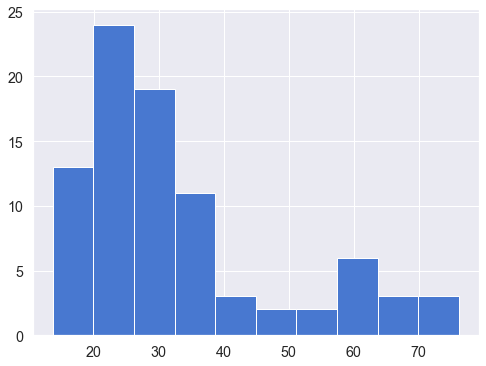

In [175]:
# the distribution of fat percentage across patients
plt.hist(liver_took_table['Fat,Percentage_liver'])

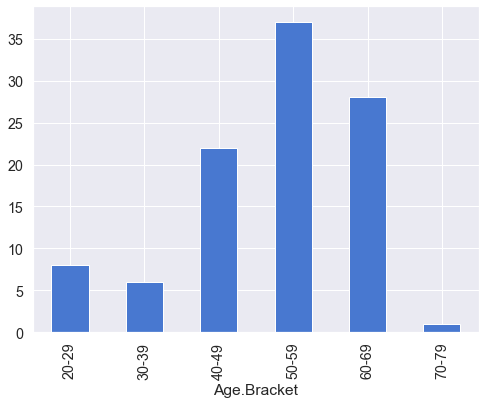

In [81]:
# the distribution of age across liver samples from patients
withseq.groupby('Age.Bracket')['Age.Bracket'].count().plot(kind = 'bar')

### Analysis of whole dataset

(array([16., 31., 20., 12.,  3.,  2.,  3.,  8.,  3.,  4.]),
 array([13.69840225, 19.94633599, 26.19426973, 32.44220347, 38.69013721,
        44.93807096, 51.1860047 , 57.43393844, 63.68187218, 69.92980592,
        76.17773966]),
 <a list of 10 Patch objects>)

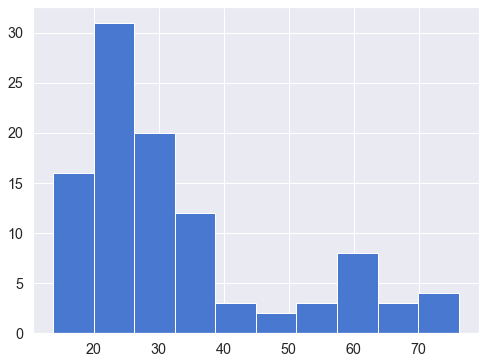

In [47]:
plt.hist(withseq['Fat,Percentage_liver'])

(array([39., 12., 18., 10.,  7.,  2.,  3.,  6.,  0.,  5.]),
 array([ 2.62037956,  9.01104677, 15.40171397, 21.79238118, 28.18304839,
        34.5737156 , 40.96438281, 47.35505002, 53.74571722, 60.13638443,
        66.52705164]),
 <a list of 10 Patch objects>)

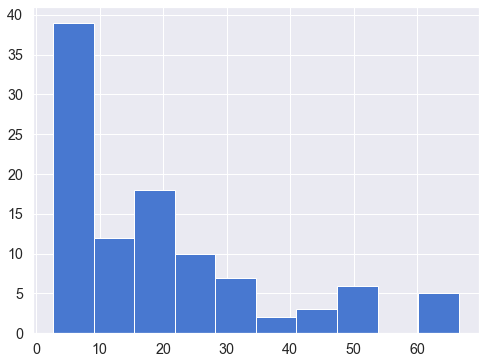

In [48]:
plt.hist(withseq['Fat,Percentage_pancreas'])

#### Analysis of all pancreas samples from patients

Text(16.723, 0.5, 'Fat %, pancreas')

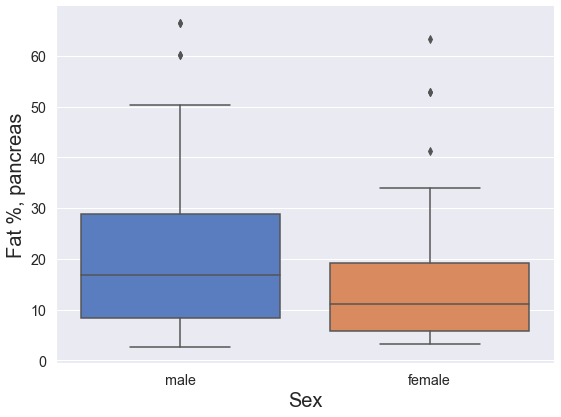

In [32]:
sns.catplot(x = "Sex", y = "Fat,Percentage_pancreas", kind = 'box', data = withseq, height=6, aspect=8/6)
plt.xlabel('Sex',fontsize=20)
plt.ylabel('Fat %, pancreas',fontsize=20)

Text(16.723000000000013, 0.5, 'Fat %, pancreas')

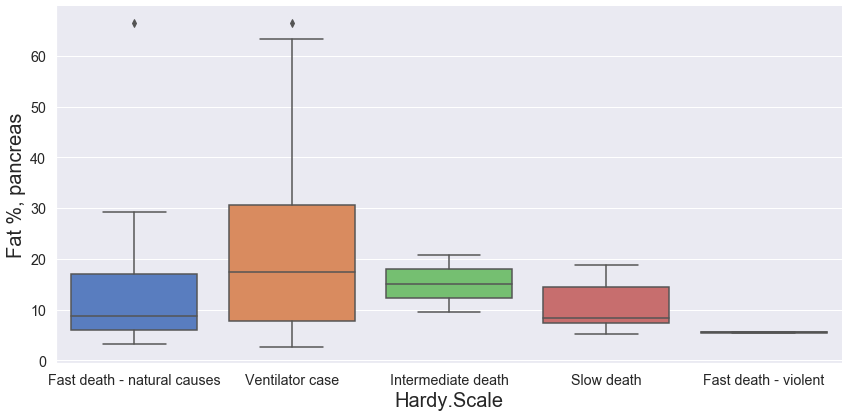

In [59]:
sns.catplot(x = "Hardy.Scale", y = "Fat,Percentage_pancreas", kind = 'box', data = withseq, height=6, aspect=12/6)
plt.xlabel('Hardy.Scale',fontsize=20)
plt.ylabel('Fat %, pancreas',fontsize=20)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

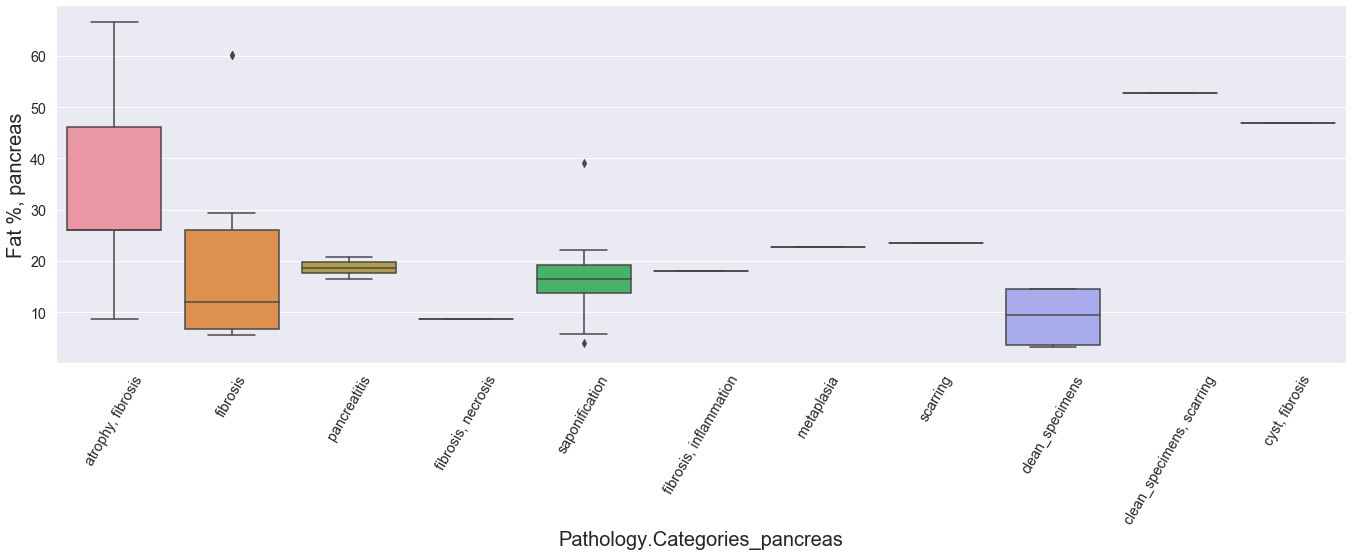

In [72]:
sns.catplot(x = "Pathology.Categories_pancreas", y = "Fat,Percentage_pancreas", 
            kind = 'box', data = withseq, height=6, aspect=19/6)
plt.xlabel('Pathology.Categories_pancreas',fontsize=20)
plt.ylabel('Fat %, pancreas',fontsize=20)
plt.xticks(rotation=60)

Text(16.723, 0.5, 'Fat %, pancreas')

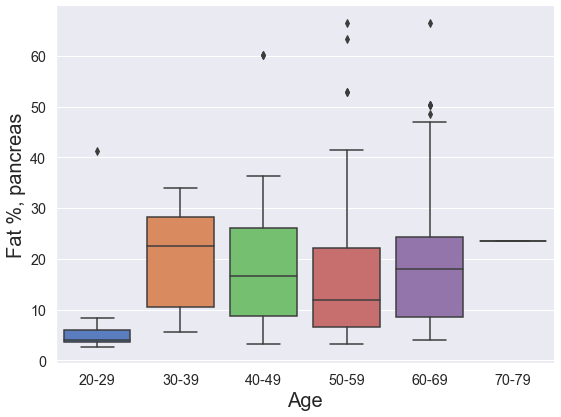

In [79]:
sns.catplot(x = "Age.Bracket", y = "Fat,Percentage_pancreas", kind = 'box', data = withseq, height=6, aspect=8/6)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Fat %, pancreas',fontsize=20)

#### Analysis of all liver samples from patients

Text(16.723000000000013, 0.5, 'Fat %, liver')

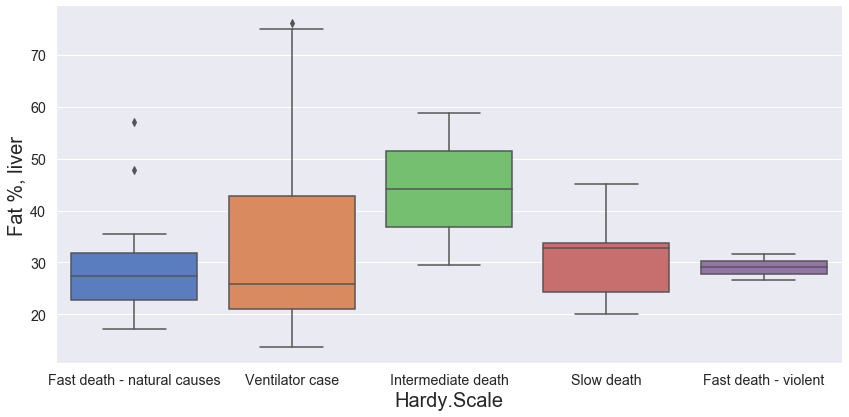

In [60]:
sns.catplot(x = "Hardy.Scale", y = "Fat,Percentage_liver", kind = 'box', data = withseq, height=6, aspect=12/6)
plt.xlabel('Hardy.Scale',fontsize=20)
plt.ylabel('Fat %, liver',fontsize=20)

Text(16.723, 0.5, 'Fat %, liver')

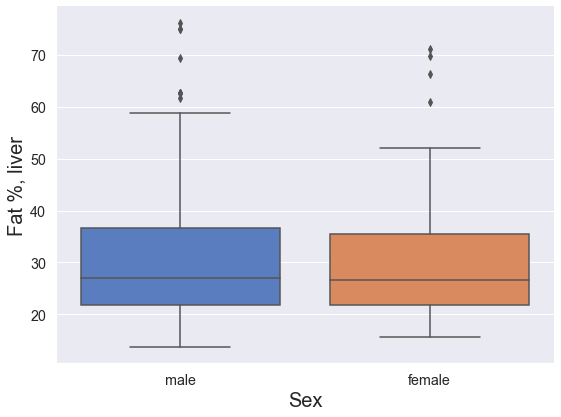

In [33]:
sns.catplot(x = "Sex", y = "Fat,Percentage_liver", kind = 'box', data = withseq, height=6, aspect=8/6)
plt.xlabel('Sex',fontsize=20)
plt.ylabel('Fat %, liver',fontsize=20)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 <a list of 22 Text xticklabel objects>)

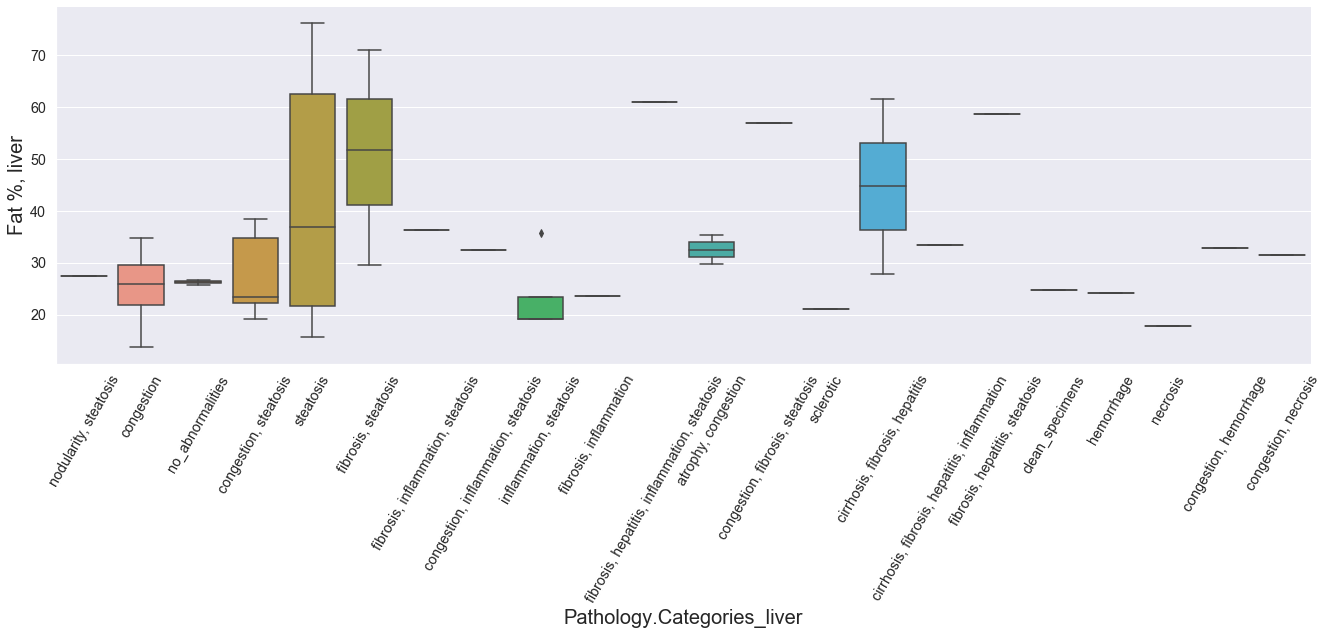

In [71]:
sns.catplot(x = "Pathology.Categories_liver", y = "Fat,Percentage_liver", 
            kind = 'box', data = withseq, height=6, aspect=19/6)
plt.xlabel('Pathology.Categories_liver',fontsize=20)
plt.ylabel('Fat %, liver',fontsize=20)
plt.xticks(rotation=60)

Text(16.723, 0.5, 'Fat %, liver')

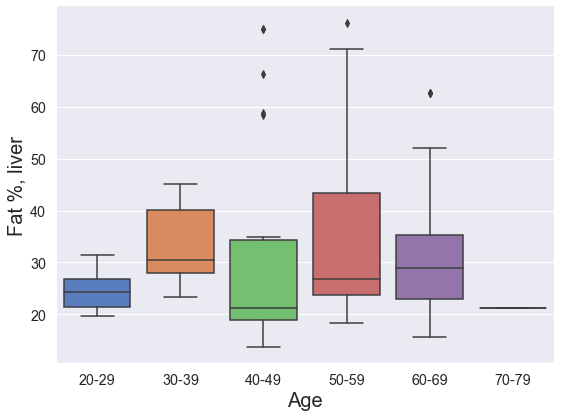

In [80]:
sns.catplot(x = "Age.Bracket", y = "Fat,Percentage_liver", kind = 'box', data = withseq, height=6, aspect=8/6)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Fat %, liver',fontsize=20)

# Analysis for big dataset with samples

In [11]:
alldata = pd.read_csv('GTEx_pancreas_liver_images_liverfat_pancreasfat.csv', sep=';')
alldata.head()

,Subject.ID,Tissue.Sample.ID_pancreas,Sex,Age.Bracket,Hardy.Scale,Pathology.Categories_pancreas,Pathology.Notes_pancreas,Tissue.Sample.ID_liver,Pathology.Categories_liver,Pathology.Notes_liver,Fat.Percentage_liver,Fat.Percentage_pancreas
0,GTEX-1117F,GTEX-1117F-1726,female,60-69,Slow death,saponification,"2 pieces, marked saponification/autolysis, ~30...",GTEX-1117F-1126,necrosis,"2 pieces, subtotal massive hepatic necrosis",28.672134,26.688684
1,GTEX-111FC,GTEX-111FC-1526,male,60-69,Fast death - violent,NaN,"2 pieces, markedly autolyzed pancreas (not adi...",GTEX-111FC-1226,congestion,"2 pieces, congestion",33.668883,9.667266
2,GTEX-111VG,GTEX-111VG-0926,male,60-69,Intermediate death,NaN,2 pieces; 10 and 50% fat,GTEX-111VG-0826,"fibrosis, inflammation",2 pieces; chronic inflammation and fibrosis,32.850612,43.050468
3,GTEX-113JC,GTEX-113JC-0526,female,50-59,Fast death - natural causes,NaN,2 pieces,GTEX-113JC-0426,steatosis,2 pieces; mild macrovesicular steatosis,31.373621,5.533414
4,GTEX-117XS,GTEX-117XS-1126,male,60-69,Fast death - natural causes,NaN,"2 pieces, fat from 30 to 50%, severe autolysis",GTEX-117XS-0926,"fibrosis, inflammation, steatosis","2 pieces, mild steatosis, widening of sinusoid...",29.382420,45.074451


In [75]:
alldata = alldata.sort_values(by=['Age.Bracket'])

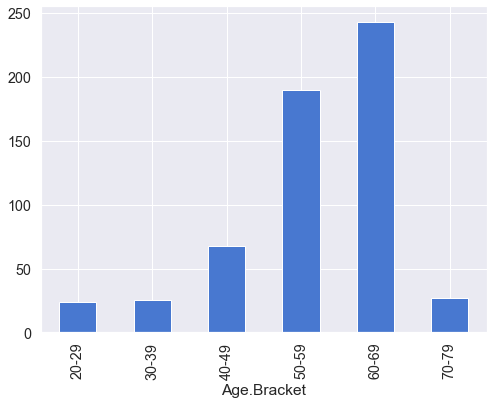

In [82]:
# age distribution
alldata.groupby('Age.Bracket')['Age.Bracket'].count().plot(kind = 'bar')

(array([ 23., 192., 203.,  72.,  34.,  25.,  16.,   7.,   4.,   1.]),
 array([10.36205922, 18.3585933 , 26.35512739, 34.35166147, 42.34819556,
        50.34472964, 58.34126373, 66.33779781, 74.3343319 , 82.33086598,
        90.32740007]),
 <a list of 10 Patch objects>)

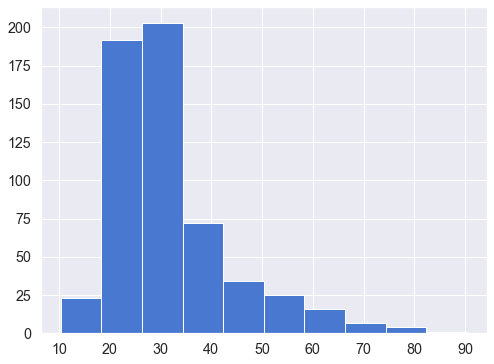

In [247]:
# fat% distribution for liver
plt.hist(alldata['Fat.Percentage_liver'])

(array([226., 139.,  82.,  45.,  33.,  19.,  11.,  11.,   7.,   4.]),
 array([ 2.62037956, 11.66936396, 20.71834836, 29.76733277, 38.81631717,
        47.86530157, 56.91428597, 65.96327038, 75.01225478, 84.06123918,
        93.11022359]),
 <a list of 10 Patch objects>)

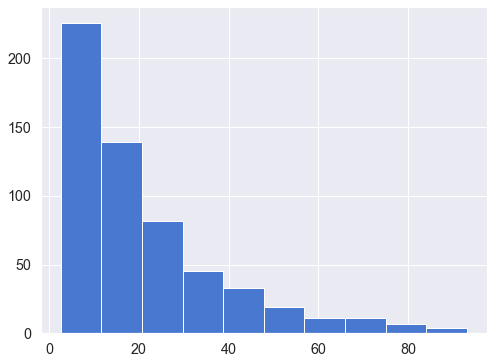

In [248]:
# fat% distribution for pancreas
plt.hist(alldata['Fat.Percentage_pancreas'])

#### Analysis of all pancreas samples from patients

Text(16.723, 0.5, 'Fat %, pancreas')

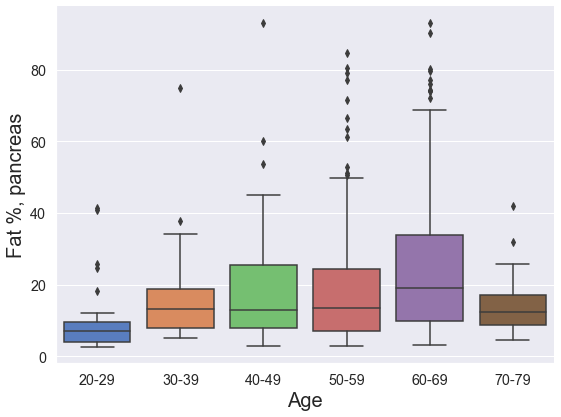

In [76]:
sns.catplot(x = "Age.Bracket", y = "Fat.Percentage_pancreas", kind = 'box', data = alldata, height=6, aspect=8/6)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Fat %, pancreas',fontsize=20)

Text(16.723000000000013, 0.5, 'Fat %, pancreas')

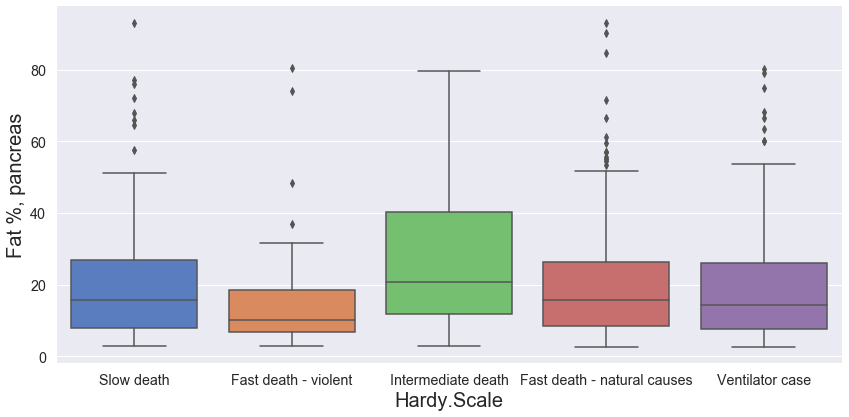

In [61]:
sns.catplot(x = "Hardy.Scale", y = "Fat.Percentage_pancreas", kind = 'box', data = alldata, height=6, aspect=12/6)
plt.xlabel('Hardy.Scale',fontsize=20)
plt.ylabel('Fat %, pancreas',fontsize=20)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text xticklabel objects>)

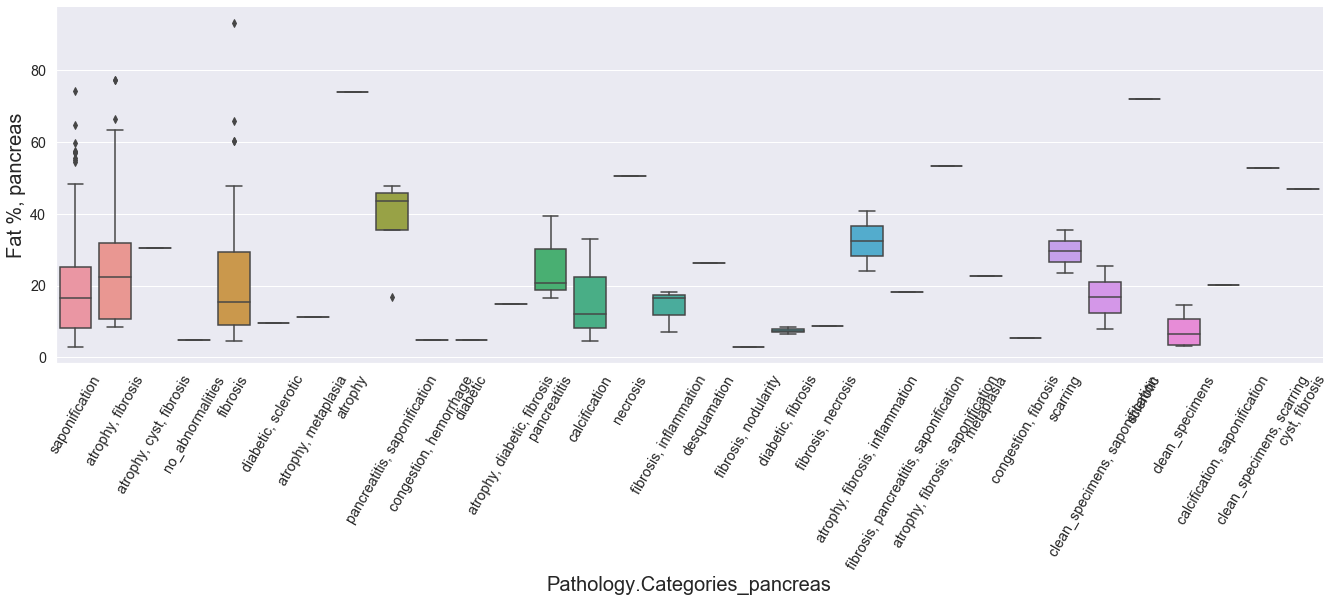

In [69]:
sns.catplot(x = "Pathology.Categories_pancreas", y = "Fat.Percentage_pancreas", 
            kind = 'box', data = alldata, height=6, aspect=19/6)
plt.xlabel('Pathology.Categories_pancreas',fontsize=20)
plt.ylabel('Fat %, pancreas',fontsize=20)
plt.xticks(rotation=60)

#### Analysis of all liver samples from patients

Text(16.723, 0.5, 'Fat %, pancreas')

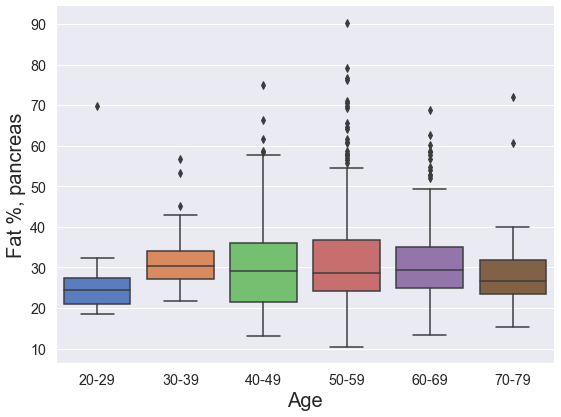

In [77]:
sns.catplot(x = "Age.Bracket", y = "Fat.Percentage_liver", kind = 'box', data = alldata, height=6, aspect=8/6)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Fat %, pancreas',fontsize=20)

Text(16.723000000000013, 0.5, 'Fat %, liver')

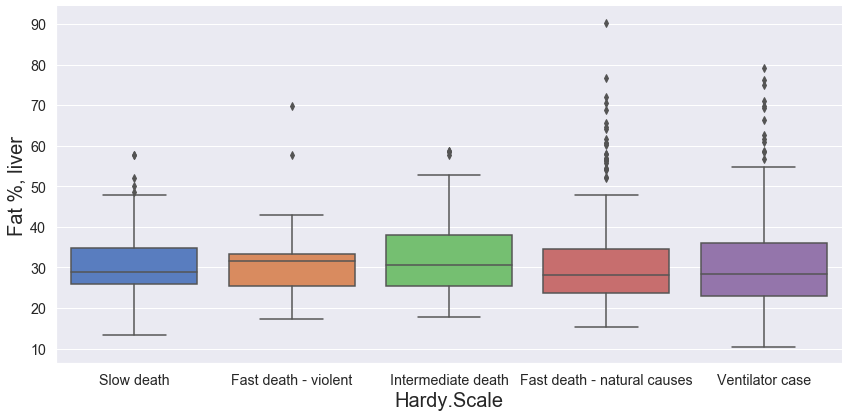

In [62]:
sns.catplot(x = "Hardy.Scale", y = "Fat.Percentage_liver", kind = 'box', data = alldata, height=6, aspect=12/6)
plt.xlabel('Hardy.Scale',fontsize=20)
plt.ylabel('Fat %, liver',fontsize=20)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),
 <a list of 62 Text xticklabel objects>)

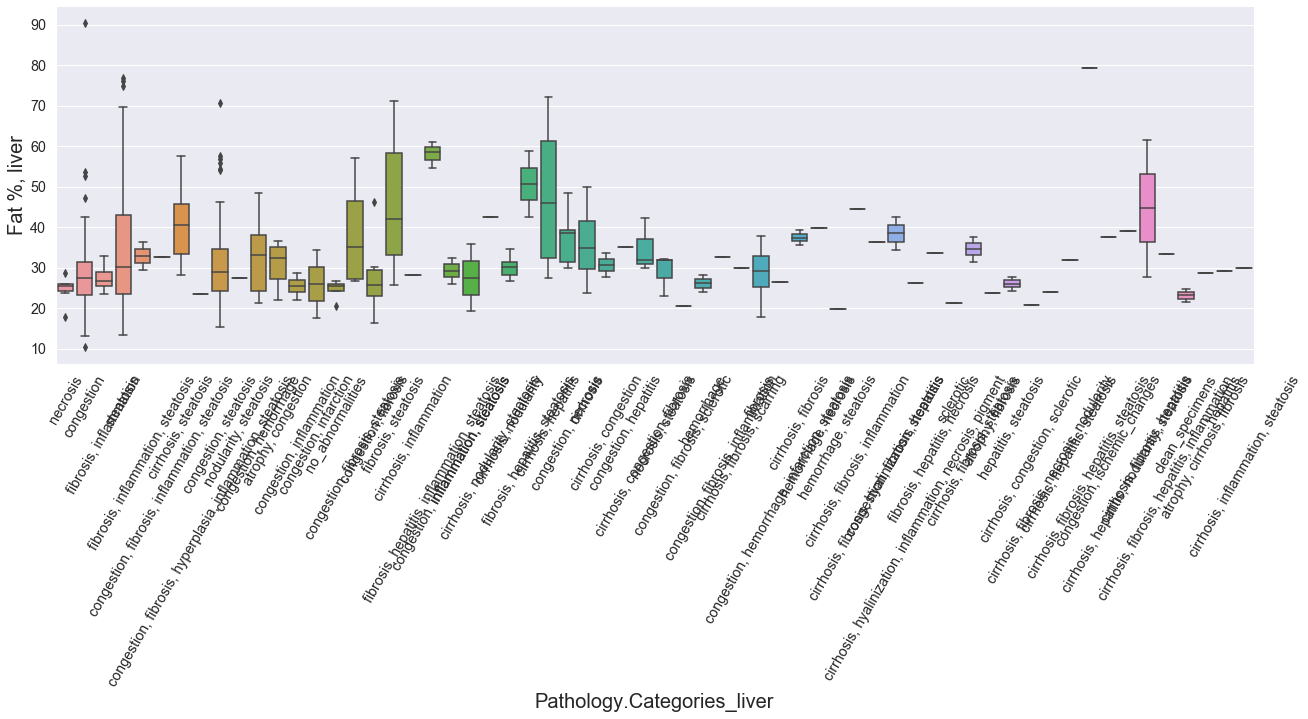

In [70]:
sns.catplot(x = "Pathology.Categories_liver", y = "Fat.Percentage_liver", 
            kind = 'box', data = alldata, height=6, aspect=19/6)
plt.xlabel('Pathology.Categories_liver',fontsize=20)
plt.ylabel('Fat %, liver',fontsize=20)
plt.xticks(rotation=60)